<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/Keras/LinearActivationKerasDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [4]:
df = pd.DataFrame([[8, 8, 4], [7, 9, 5], [6, 10, 6], [5, 12, 7]], columns=["cgpa", "profile_score", "lpa"])

In [5]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(2, activation="linear", input_dim=2))
model.add(Dense(1, activation="linear"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.get_weights()

[array([[-0.41757268,  0.20824063],
        [-1.2236615 , -1.1017779 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.78497875],
        [-0.83556056]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
new_weights = [np.array([[0.1, 0.1], [0.1, 0.1]], dtype = np.float32),
               np.array([0., 0.], dtype=np.float32),
               np.array([[0.1], [0.1]], dtype=np.float32),
               np.array([0.], dtype=np.float32)]

In [15]:
new_weights

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [16]:
model.set_weights(new_weights)

In [18]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [29]:
df.iloc[:, 0:-1].values

array([[ 8,  8],
       [ 7,  9],
       [ 6, 10],
       [ 5, 12]])

In [30]:
df["lpa"].values

array([4, 5, 6, 7])

In [40]:
history = model.fit(df.iloc[:,0:-1].values, df['lpa'].values, epochs=75, verbose=1, batch_size=1)

Epoch 1/75
4/4 [==============================] - 0s 4ms/step - loss: 0.9398
Epoch 2/75
4/4 [==============================] - 0s 4ms/step - loss: 0.9382
Epoch 3/75
4/4 [==============================] - 0s 5ms/step - loss: 0.9394
Epoch 4/75
4/4 [==============================] - 0s 5ms/step - loss: 0.9373
Epoch 5/75
4/4 [==============================] - 0s 6ms/step - loss: 0.9341
Epoch 6/75
4/4 [==============================] - 0s 5ms/step - loss: 0.9316
Epoch 7/75
4/4 [==============================] - 0s 5ms/step - loss: 0.9322
Epoch 8/75
4/4 [==============================] - 0s 10ms/step - loss: 0.9282
Epoch 9/75
4/4 [==============================] - 0s 11ms/step - loss: 0.9322
Epoch 10/75
4/4 [==============================] - 0s 5ms/step - loss: 0.9246
Epoch 11/75
4/4 [==============================] - 0s 5ms/step - loss: 0.9245
Epoch 12/75
4/4 [==============================] - 0s 5ms/step - loss: 0.9246
Epoch 13/75
4/4 [==============================] - 0s 11ms/step - loss:

In [33]:
model.get_weights()

[array([[0.3617561 , 0.3617561 ],
        [0.41051742, 0.41051742]], dtype=float32),
 array([0.2938639, 0.2938639], dtype=float32),
 array([[0.39836207],
        [0.39836207]], dtype=float32),
 array([0.21743743], dtype=float32)]

In [37]:
y_pred = model.predict(df.iloc[:,0:-1].values)

In [38]:
y_pred

array([[5.3738775],
       [5.412727 ],
       [5.4515758],
       [5.817494 ]], dtype=float32)

In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_pred, df.lpa.values))

-28.84190616230402


In [41]:
import matplotlib.pyplot as plt


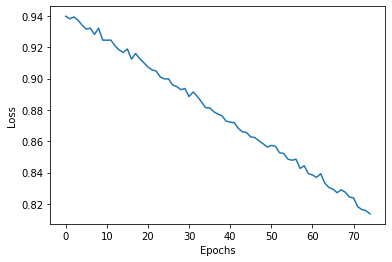

In [44]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()